In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
#splitting into training and testing from the mnist dataset provided by Keras
from keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

The MNIST dataset consists of images of handwritten digits from 0 to 9. Each image is a grayscale 28x28 pixel square. Here’s a breakdown of what these images look like:

Digits 0-9: The images represent the digits 0 through 9 as they might be written by different people. For example, you might see a variety of styles for the digit "1"—some written with a simple straight line, others with a small curve at the top, and so on.

Image Details:

Size: Each image is 28x28 pixels.
Color: The images are grayscale, so each pixel value ranges from 0 (black) to 255 (white).
Background: The background of the images is generally black or dark gray, while the digit itself is white or light gray.

In [3]:
# our X train dataset
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

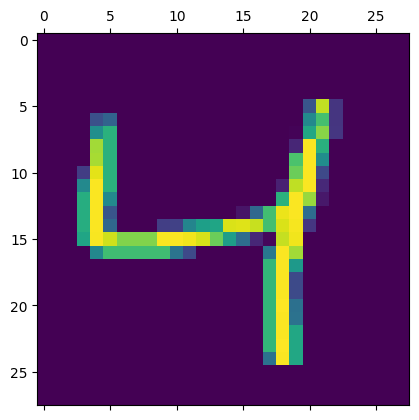

In [6]:
#Plotting the 3rd training image
plt.matshow(X_train[2])

In [7]:
# and the corresponding y value
y_train[2]

4

In [8]:
X_train.shape

(60000, 28, 28)

Scaling the dataset to get an accurate result

In [9]:
X_train = X_train/255
X_test = X_test/255
#values will be between 0 and 1

The X train set should be flattened

In [10]:
# X_train_flattened = X_train.reshape(len(X_train), 28*28)
#or
X_train_flattened = X_train.reshape(-1,28*28)
X_train_flattened.shape

# X_train has a shape of (60000, 28, 28), meaning there are 60,000 images, each of size 28x28 pixels.
#X_train_flattened has a shape of (60000, 784), meaning there are still 60,000 images, but each image is now represented as a 1D array of 784 features.
#Each row in X_train_flattened corresponds to an image from X_train, but in a flattened form. [pixel_1, pixel_2, ..., pixel_784] .This allows the neural network to process each image as a single vector of features.

(60000, 784)

In [11]:
#Flatten X test aswell
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [12]:
X_train_flattened[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
keras_model = keras.Sequential([
        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') #ten output nodes/ neurons
    ])
keras_model.compile(optimizer='adam', 
                    loss='sparse_categorical_crossentropy', #loss- our output class is categorical. Sparse means our output variable, which is y train is an integer number
                    metrics=['accuracy']
                ) 

keras_model.fit(X_train_flattened,y_train, epochs=10) #we did not flatten y train because it is already an 2d array

c:\Users\Randy\Desktop\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8166 - loss: 0.7199
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9131 - loss: 0.3134
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9215 - loss: 0.2813
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9256 - loss: 0.2704
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9253 - loss: 0.2629
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9263 - loss: 0.2635
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9312 - loss: 0.2501
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9296 - loss: 0.2519
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9301 - loss: 0.2549
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9317 - loss: 0.2457


Evaluating Accuracy on A test Dataset

In [14]:
keras_model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9156 - loss: 0.2995


[0.2646273374557495, 0.9264000058174133]

Doing a Sample Prediction

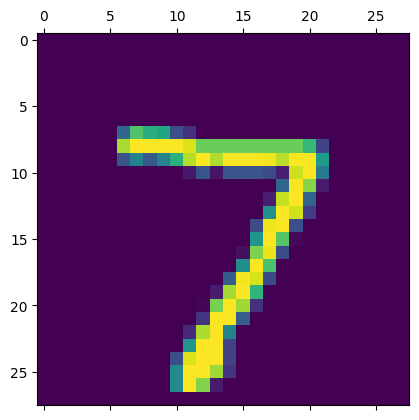

In [15]:
#looking at X test
plt.matshow(X_test[0])

In [16]:
# predicting element at index zero(above)
y_predict = keras_model.predict(X_test_flattened)
y_predict[0] #it is predicting either of the numbers from zero to 9(ten outputs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([4.3113846e-03, 1.5101749e-08, 1.1763256e-02, 9.6250695e-01,
       9.9784601e-04, 1.4003481e-01, 4.8256606e-08, 9.9990803e-01,
       9.1186114e-02, 6.5806794e-01], dtype=float32)

In [17]:
def find_max_value(lst):
    max_value = np.max(lst)  # Find the max value using NumPy
    max_index = np.argmax(lst)  # Find the index of the max value using NumPy
    return max_value, max_index

find_max_value(y_predict[8])


(0.99954855, 6)

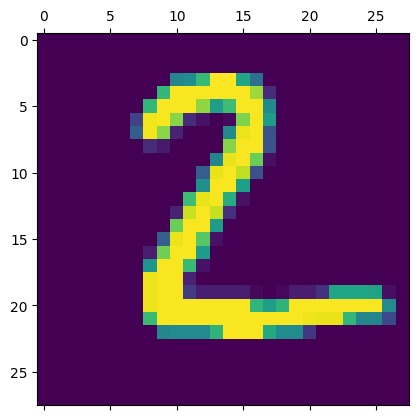

In [18]:
plt.matshow(X_test[1])

In [19]:
y_predict[1]

array([3.2422408e-01, 4.1008955e-03, 9.9970424e-01, 9.4413012e-02,
       1.0436208e-11, 7.9298097e-01, 8.5645300e-01, 1.8662302e-15,
       6.8050966e-02, 4.5221652e-12], dtype=float32)

In [20]:
find_max_value(y_predict[1])

(0.99970424, 2)

To build a confusion Matrix

In [21]:
y_predict_labels = [np.argmax(i) for i in y_predict] # find the max value for each output
y_predict_labels[:5] #for first five values

[7, 2, 1, 0, 4]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
# suply the truth data and the predictions data
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    7,    4,    2,    1,    0],
       [   0, 1116,    5,    2,    0,    1,    3,    2,    6,    0],
       [   3,    8,  929,   15,    6,    4,   11,   12,   40,    4],
       [   4,    0,   24,  909,    0,   24,    2,   13,   25,    9],
       [   1,    1,    8,    1,  907,    0,   10,    5,   10,   39],
       [   9,    3,    2,   28,    7,  778,   15,    9,   34,    7],
       [  13,    3,   10,    1,    7,   12,  908,    2,    2,    0],
       [   1,    6,   24,    2,    4,    0,    0,  962,    1,   28],
       [   8,   12,    6,   15,    9,   21,    9,   12,  872,   10],
       [  11,    7,    1,    7,   20,    6,    0,   31,    6,  920]])>

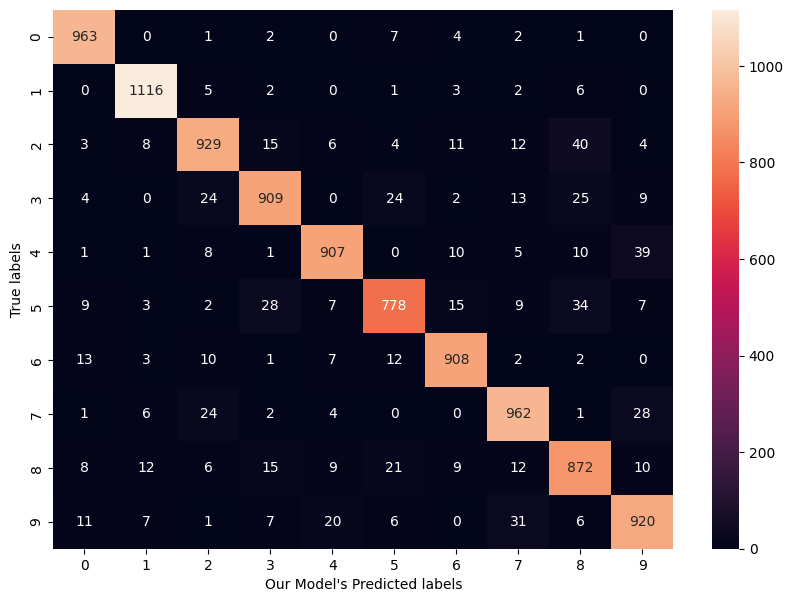

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Our Model's Predicted labels")
plt.ylabel('True labels')
plt.show()

Copying the same model and adding a hidden layer

In [25]:
keras_model_2 = keras.Sequential([
        keras.layers.Dense(100, input_shape=(784,), activation='relu'), #100 output nodes/ neurons. This is a hidden layer
        keras.layers.Dense(10, activation='sigmoid') #hidden layer. it corresponds to the number of classifications we have
    ])
keras_model_2.compile(
                    optimizer='adam',
                    loss='sparse_categorical_crossentropy', #loss- our output class is categorical. Sparse means our output variable, which is y train is an integer number
                    metrics=['accuracy']
                )

keras_model_2.fit(X_train_flattened,y_train, epochs=10) #we did not flatten y train because it is already an 2d array

c:\Users\Randy\Desktop\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8700 - loss: 0.4594
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9605 - loss: 0.1325
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9740 - loss: 0.0885
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9802 - loss: 0.0658
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9876 - loss: 0.0414
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0333
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9915 - loss: 0.0277
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9942 - loss: 0.0207
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0169


In [26]:
# keras_model.evaluate(X_test_flattened, y_test)
y_predict_2 = keras_model_2.predict(X_test_flattened)
y_predict_2_labels = [np.argmax(i) for i in y_predict_2]
y_predict_2_labels[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[7, 2, 1, 0, 4]

In [27]:
# build a confusion matrix 
y_predict_labels = [np.argmax(i) for i in y_predict] # find the max value for each output and assign
y_predict_labels[:5] #for first five values
cm_2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_2_labels)
cm_2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    0,    0,    3,    2,    2,    2,    0],
       [   0, 1123,    3,    2,    0,    1,    3,    2,    1,    0],
       [   4,    1, 1003,    2,    1,    1,    3,    8,    8,    1],
       [   1,    0,    9,  979,    1,    6,    0,    3,    6,    5],
       [   2,    0,    6,    1,  936,    1,    4,    5,    4,   23],
       [   2,    0,    0,    6,    1,  868,    5,    2,    3,    5],
       [   7,    2,    2,    2,    6,    3,  933,    2,    1,    0],
       [   0,    2,    9,    1,    1,    1,    0, 1005,    3,    6],
       [   7,    0,    6,    4,    5,    1,    5,    4,  935,    7],
       [   2,    2,    1,    0,    7,    4,    0,    4,    1,  988]])>

Translating it into a heatmap Figure

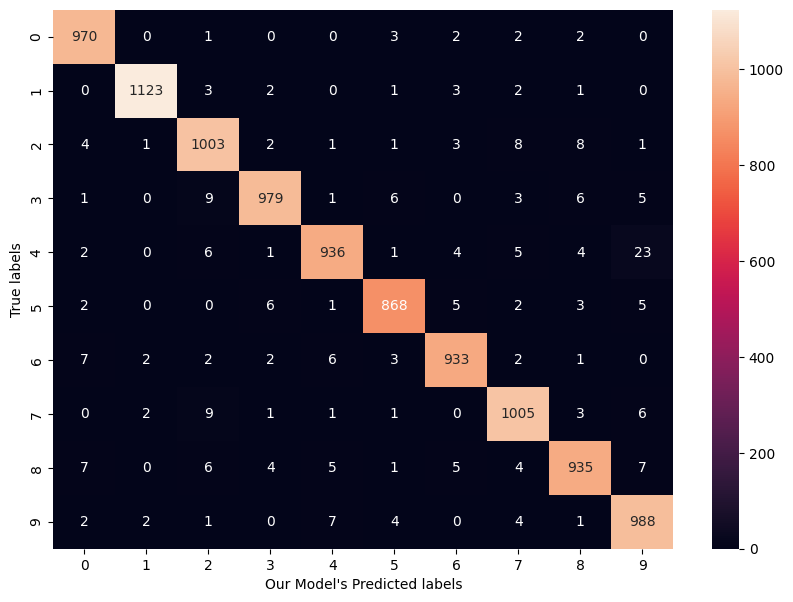

In [28]:
plt.figure(figsize=(10,7))
sn.heatmap(cm_2, annot=True, fmt='d')
plt.xlabel("Our Model's Predicted labels")
plt.ylabel('True labels')
plt.show()

How to flatten inputs in Keras without doing it manually

In [29]:
keras_model_3 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(100, activation='relu'), #100 output nodes/ neurons. This is a hidden layer
        keras.layers.Dense(10, activation='sigmoid') #hidden layer
    ])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

keras_model_3.compile(
                    optimizer='SGD', 
                    loss='sparse_categorical_crossentropy', #loss- our output class is categorical. Sparse means our output variable, which is y train is an integer number
                    metrics=['accuracy']
                ) 

keras_model_3.fit(X_train,y_train, epochs=5, callbacks=[tb_callback]) #we did not flatten y train because it is already an 2d array

c:\Users\Randy\Desktop\Python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7362 - loss: 1.0149
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8986 - loss: 0.3592
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9154 - loss: 0.3012
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9211 - loss: 0.2786
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9305 - loss: 0.2500


In [30]:
y_predict_3 = keras_model_3.predict(X_test)
np.argmax(y_predict_3[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


7

In [31]:
%load_ext tensorboard
%tensorboard --logdir logs/fit